<img src='./pic/sharif-main-logo.png' alt="SUT logo" width=300 height=300 align=left class="saturate" > <br>

<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024 <br>
<font color=3C99D size=5>
    Practical Assignment 1 - Supervised Learning <br>
<font color=696880 size=4>
    Erfan Salima, Nikan Vasei, Fatemeh Shiri, Sarina Heshmati

____

# Personal Data

In [237]:
student_number = '401104146'
Name = 'Ghazal'
Last_Name = 'Zolfi Moselo' 

# Libraries

In [238]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures

# Polynomial Regression & Bias-Variance Tradeoff (100 Points)

<font size=4>
Author: Nikan Vasei

## Introduction
In this part, we will explore the **bias-variance tradeoff** using polynomial regression models. Polynomial regression allows us to model complex relationships between an independent variable $X$ and a dependent variable $y$ by introducing higher-degree polynomial terms. However, increasing the complexity of the model can lead to **overfitting** or **underfitting**, which are key concepts in the bias-variance tradeoff.

## Plan
1. **Create a synthetic dataset**: Use the provided quadratic function to generate $X$ and $y$ with noise.
2. **Split the dataset**: Divide the data into training and test sets to evaluate model generalization.
3. **Train polynomial models**: Fit polynomial regression models with degrees ranging from 1 to 10 (or more).
4. **Evaluate performance**: Calculate the MSE for both training and test sets and compare the errors for different polynomial degrees.
5. **Analyze the results**: Use plots to visualize how the error on the training and test sets changes as the model complexity increases.

## Objective
The objective is to determine the degree of the polynomial that best models the relationship between $X$ and $y$ and balances both underfitting and overfitting, i.e., the degree that achieves the best generalization.

## 1. Create a synthetic dataset (15 Points)

Your first task is to define a function that generates a dataset with 1000 samples. The input values for the independent variable $X$ should be randomly selected within the range of **-3 to 3**. To make the dataset more realistic, add noise to the output using a normal distribution with a mean of 0 and a standard deviation of 10.

The relationship between the independent variable $X$ and the dependent variable $y$ is modeled by the following equation:

$$
y = 0.2X^6 - 0.5X^5 + 2X^4 - 5X^3 + 3X^2 - 10X + 5 + \text{noise}
$$

In [239]:
def generate_dataset(range_start, range_end, num_samples=1000, noise_std=10.0):
    # TODO: Generate dataset
    X = np.random.uniform(range_start, range_end, num_samples)
    noise = np.random.normal(0, noise_std, num_samples)
    y = 0.2 * X**6 - 0.5 * X**5 + 2 * X**4 - 5 * X**3 + 3 * X**2 - 10 * X + 5 + noise
    
    return X, y

Use a scatter plot to visualize the relationship between $X$ and $y$. This will help you understand the structure of the generated data before moving on to fitting models.

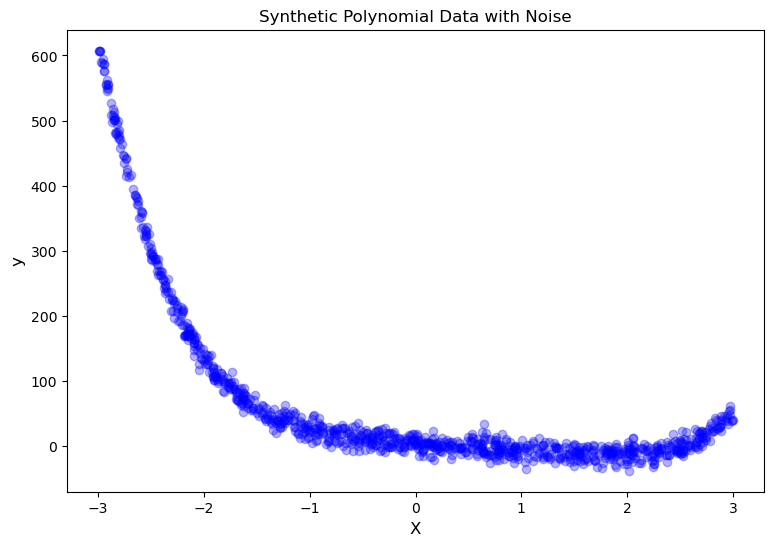

In [240]:
X, y = generate_dataset(-3, 3)

# TODO: Visualize the dataset using scatter
plt.figure(figsize=(9,6))
plt.scatter(X, y, color='b', alpha=0.3)
plt.title("Synthetic Polynomial Data with Noise", fontsize=12)
plt.xlabel("X", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.show()

## 2. Splitting the Dataset (5 Points)

In this task, you should split the dataset into three parts:
1. **Training Set**
2. **In-Range Test Set**: This set should contain data within the same range as the training set.
3. **Out-of-Range Test Set**: This set should contain data in the range **[5, 7]**.

Ensure that the two test sets (In-Range and Out-of-Range) have the same length. You can use the `train_test_split` function from the `sklearn` library for convenience in splitting the data.

In [241]:
# TODO: Split dataset into the training and the in-range testing sets
X_train, X_in_range_test, y_train, y_in_range_test = train_test_split(X, y, test_size=0.2, random_state=42)
# TODO: Generate the out-of-range testing set
num_out_of_range_samples = len(X_in_range_test)
X_out_of_range_test = np.random.uniform(5, 7, num_out_of_range_samples)
noise = np.random.normal(0, 10, num_out_of_range_samples)
y_out_of_range_test = 0.2 * X_out_of_range_test**6 - 0.5 * X_out_of_range_test**5 + 2 * X_out_of_range_test**4 - 5 * X_out_of_range_test**3 + 3 * X_out_of_range_test**2 - 10 * X_out_of_range_test + 5 + noise


Again, you can use a scatter plot (or similar plots) to visualize the different sets and see their overall distributions.

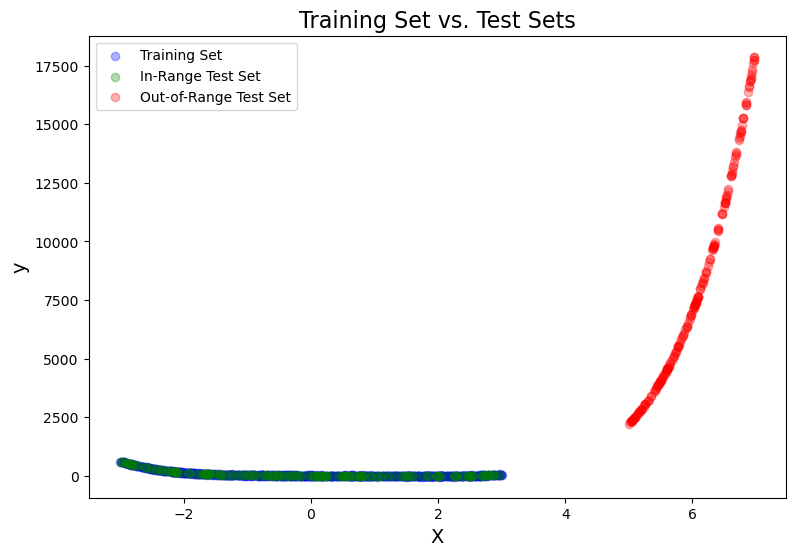

In [242]:
# TODO: Visualize the sets using scatter (or other plots)

plt.figure(figsize=(9, 6))

plt.scatter(X_train, y_train, color='blue', label='Training Set', alpha=0.3)
plt.scatter(X_in_range_test, y_in_range_test, color='green', label='In-Range Test Set', alpha=0.3)
plt.scatter(X_out_of_range_test, y_out_of_range_test, color='red', label='Out-of-Range Test Set', alpha=0.3)

plt.title("Training Set vs. Test Sets", fontsize=16)
plt.xlabel("X", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend()
plt.show()


## 3. Polynomial Regression Training (25 Points)

In this task, you should train polynomial regression models with varying degrees, ranging from degree = 2 to degree = 9. You can use the `preprocessing`, `linear_model`, and `pipeline` classes from the `sklearn` library to create and evaluate these models.

In [243]:
def train_models(X, y, degree):
    # TODO: Create and train a model based on the given degree
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression())
    model.fit(X.reshape(-1, 1), y)
    return model

In [244]:
models = {}
degree = 9

# TODO: Add the trained models with different degrees to the dict
for deg in range(2, degree+1):
    models[deg] = train_models(X_train, y_train, deg)
    
models

{2: Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                 ('linearregression', LinearRegression())]),
 3: Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                 ('linearregression', LinearRegression())]),
 4: Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                 ('linearregression', LinearRegression())]),
 5: Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                 ('linearregression', LinearRegression())]),
 6: Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=6)),
                 ('linearregression', LinearRegression())]),
 7: Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=7)),
                 ('linearregression', LinearRegression())]),
 8: Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=8)),
                 ('linearregression', LinearRegression())]),
 9: Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(d

## 4. Model Evaluation (20 Points)

In this task, you should evaluate the polynomial regression models on both test sets (In-Range Test Set and Out-of-Range Test Set) using Mean Squared Error (MSE). This evaluation will help you understand how well each model generalizes to different data ranges.

For each polynomial degree, compute the MSE on both the in-range test set and the out-of-range test set using the `mean_squared_error` function from the `sklearn` library.

In [245]:
def evaluate_models(models, X_test, y_test):
    # TODO: Calculate MSE of each model (on the input test set).
    losses = {}
    for degree, model in models.items():
        y_pred = model.predict(X_test.reshape(-1, 1))
        mse = mean_squared_error(y_test, y_pred)
        losses[degree] = mse
    return losses

In [246]:
# TODO: Evaluate models on both the train and the test sets.

train_mse = evaluate_models(models, X_train, y_train)

in_range_mse = evaluate_models(models, X_in_range_test, y_in_range_test)

out_of_range_mse = evaluate_models(models, X_out_of_range_test, y_out_of_range_test)

print("MSE on In-Range Test Set:")
for degree, mse in train_mse.items():
    print(f"Degree {degree}: {mse}")
    
print("\nMSE on In-Range Test Set:")
for degree, mse in in_range_mse.items():
    print(f"Degree {degree}: {mse}")

print("\nMSE on Out-of-Range Test Set:")
for degree, mse in out_of_range_mse.items():
    print(f"Degree {degree}: {mse}")

MSE on In-Range Test Set:
Degree 2: 2486.78583296754
Degree 3: 859.5179522193782
Degree 4: 122.29155959618987
Degree 5: 99.46710642732549
Degree 6: 93.87632877207444
Degree 7: 93.40060420162062
Degree 8: 93.13486427073285
Degree 9: 93.11596475415281

MSE on In-Range Test Set:
Degree 2: 3073.4538106375117
Degree 3: 951.8474624464469
Degree 4: 134.36890039023316
Degree 5: 93.47245751905892
Degree 6: 87.96850135218936
Degree 7: 85.96826711929221
Degree 8: 86.6074521372673
Degree 9: 86.8355380751138

MSE on Out-of-Range Test Set:
Degree 2: 73377879.8975329
Degree 3: 111417141.6341135
Degree 4: 28316350.822844476
Degree 5: 81696045.77504829
Degree 6: 1973288.8724768916
Degree 7: 58076333.65742976
Degree 8: 415780162.8412175
Degree 9: 2804749330.794883


## 5. Analyzing Model Scores (20 Points)

In this task, you will visualize and analyze the performance of polynomial regression models by plotting the **logarithm** (to better visualize differences) of losses (Mean Squared Error, MSE) for both training and test set and also by printing the losses related to each degree.

Make sure to train each model a few times to get a sense of variability in the results.

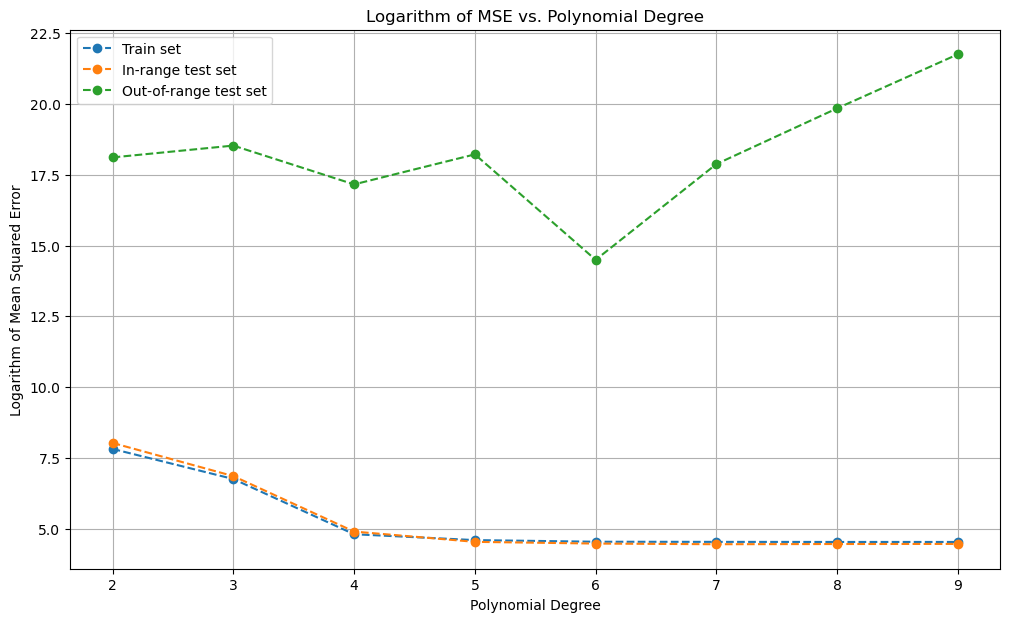

In [252]:
# TODO: Calculate the log MSE for both the train and the test sets based on the model degrees from 2 to 9
x = np.array(list(train_mse.keys())) 

train_mse_log = np.log(np.array(list(train_mse.values())))
in_range_mse_log = np.log(np.array(list(in_range_mse.values())))
out_of_range_mse_log = np.log(np.array(list(out_of_range_mse.values())))

# TODO: Plot the log MSE results
plt.figure(figsize=(12, 7))
plt.plot(x, train_mse_log, label="Train set", linestyle='--', marker='o')
plt.plot(x, in_range_mse_log, label="In-range test set", linestyle='--', marker='o') 
plt.plot(x, out_of_range_mse_log, label="Out-of-range test set", linestyle='--', marker='o') 

plt.title('Logarithm of MSE vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Logarithm of Mean Squared Error')

plt.legend()
plt.grid()

plt.show()

In [253]:
# TODO: Print each model loss on the training and the two test sets
df = pd.DataFrame({
    'Degree': x,
    'Train MSE': train_mse_log,
    'In-Range Test MSE': in_range_mse_log,
    'Out-of-Range Test MSE': out_of_range_mse_log
})
# df = df.applymap(lambda x: f"{x:.2f}")

print(df.to_string(index=False))

 Degree  Train MSE  In-Range Test MSE  Out-of-Range Test MSE
      2   7.818746           8.030557              18.111133
      3   6.756372           6.858405              18.528792
      4   4.806408           4.900589              17.158950
      5   4.599827           4.537667              18.218516
      6   4.541978           4.476979              14.495212
      7   4.536898           4.453978              17.877269
      8   4.534049           4.461386              19.845667
      9   4.533846           4.464016              21.754580


## Conclusion (15 Points)

1. Based on your analysis of the training set loss, in-range test set loss, and out-of-range test set loss across different polynomial degrees, summarize what you have learned about the bias-variance tradeoff. How do these losses illustrate the tradeoff between model complexity and performance?

- <span style="color:cyan;">**Answer:** Write your answer here</span>

Underfitting (High Bias): Low-degree models, such as linear models, tend to underfit the data. They have high training and test set losses, indicating that the model is too simple to capture the complexity of the data. This corresponds to high bias and low variance.
  
Overfitting (High Variance): High-degree polynomial models exhibit overfitting. While their training set loss is very low, the test set loss, especially for out-of-range data, increases significantly. This indicates high variance while the model fits the training data well, it fails to generalize to unseen data.

There exists a middle ground where the model complexity is just right. The training loss is low, and the in-range and out-of-range test losses are also minimized. This indicates a balance between bias and variance, where the model captures the true patterns in the data without being overly influenced by noise.

---

2. Reflecting on the trends observed in the losses as polynomial degree increases, what conclusions can you draw about the effects of model complexity on overfitting and underfitting? How does this understanding help in selecting the appropriate polynomial degree for a model?

- <span style="color:cyan;">**Answer:** Write your answer here</span>

Increasing Model Complexity: As model complexity increases (by increasing the polynomial degree), the model transitions from underfitting (high bias, low variance) to overfitting (low bias, high variance). The training loss decreases, but the test loss first decreases and then increases, forming a U-shaped curve.
  
Overfitting: Complex models with high-degree polynomials capture not just the true underlying patterns but also the noise in the data. This results in low training error but high test error, especially for out-of-range data, as the model becomes too specific to the training set.

Underfitting: Simpler models (low-degree polynomials) fail to capture the patterns in the data, leading to high errors in both training and test sets. The model is too biased and does not have enough flexibility to fit the data well.

The trends observed in the test set losses suggest that cross-validation is crucial in identifying the right level of model complexity. The optimal polynomial degree is one that minimizes the cross-validation error (in-range and out-of-range test errors), reflecting a good balance between bias and variance.
  
Choosing a model that is too simple (low-degree polynomial) will lead to underfitting, while choosing one that is too complex (high-degree polynomial) will lead to overfitting. By observing the MAPE and losses across different polynomial degrees, you can select a model that generalizes well to unseen data, ensuring that it neither underfits nor overfits.


# Regularization (50 Points)

<font size=4>
Author: Fatemeh Shiri

# **Introduction**

In this part, you will work with a real dataset that includes information about the cost of treatment of different patients. The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. <a ref= 'https://github.com/stedy/Machine-Learning-with-R-datasets'>Reference</a>

Columns available:

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance

# Plan

- First, you will start by fitting a basic regression model using scikit-learn (sklearn) to establish a baseline for comparison. This basic regression model will serve as a reference point for evaluating the performance of more sophisticated models incorporating regularization techniques.

- Furthermore, you will apply L1 (Lasso) and L2 (Ridge) regularization techniques to refine your predictions and evaluate the impact of these methods on the accuracy of your results. Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function, encouraging simpler models with smaller coefficients. L1 regularization (Lasso) encourages sparsity by penalizing the absolute values of coefficients, while L2 regularization (Ridge) penalizes the square of coefficients. 

# Load and Explore

Load the dataset (as a dataframe) using pandas and display the top 5 rows of the dataframe

In [254]:
file_path = "./InsuranceData.csv"
# TODO: Load the Dataset
InsuranceData = pd.read_csv(file_path)

InsuranceData.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Get a brief description and do some EDA to get familiar with the dataset

In [255]:
# TODO: you can use .info() and .description()
InsuranceData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [256]:
InsuranceData.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [257]:
InsuranceData.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [258]:
test_df = pd.read_csv('InsuranceData_test.csv')
test_df.head()

,age,sex,bmi,children,smoker,region
0,42,female,24.763,2,yes,northwest
1,41,male,26.454,3,no,northeast
2,52,male,37.093,0,no,southwest
3,52,female,38.641,1,no,southeast
4,64,female,36.380,0,no,southeast


# Preprocessing

In [198]:
# TODO: apply any pre processing method you think is necessary
# Options: Normalization, Standardization, Outlier Detection, Imputation, Encoding, etc.

In [259]:
encoder = LabelEncoder()
InsuranceData['sex'] = encoder.fit_transform(InsuranceData['sex'])
test_df['sex'] = encoder.transform(test_df['sex'])

InsuranceData['smoker'] = encoder.fit_transform(InsuranceData['smoker'])
test_df['smoker'] = encoder.transform(test_df['smoker'])

one_hot_encoded = pd.get_dummies(InsuranceData['region'], prefix='region')
one_hot_encoded = one_hot_encoded.astype(int)
InsuranceData = pd.concat([InsuranceData, one_hot_encoded], axis=1)
InsuranceData = InsuranceData.drop("region", axis=1)

one_hot_encoded = pd.get_dummies(test_df['region'], prefix='region')
one_hot_encoded = one_hot_encoded.astype(int)
test_df = pd.concat([test_df, one_hot_encoded], axis=1)
test_df = test_df.drop("region", axis=1)


In [260]:
InsuranceData

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


In [261]:
test_df

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,42,0,24.763,2,1,0,1,0,0
1,41,1,26.454,3,0,1,0,0,0
2,52,1,37.093,0,0,0,0,0,1
3,52,0,38.641,1,0,0,0,1,0
4,64,0,36.380,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
460,56,1,30.304,1,0,0,0,1,0
461,18,1,35.205,0,0,0,1,0,0
462,37,1,19.814,1,0,0,1,0,0
463,26,0,19.550,3,1,0,1,0,0


In [262]:
# TODO: Split the dataset into two parts such that the training set contains 80% of the samples.
X = InsuranceData.drop("charges", axis=1)
y = InsuranceData["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
y_train = np.array(y_train)
y_test = np.array(y_test)

In [263]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test_main = scaler.transform(test_df)

# Training

Fit a linear regressor to the data.

In [264]:
# TODO: Use sklearn
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [265]:
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("Mean Absolute Percentage Error: ", mape)

Mean Squared Error:  33596915.851361476
Mean Absolute Percentage Error:  0.46888255979146987


Get the coefficients of the variables and visualize it

Coefficients of the Linear Regression Model:
                   Coefficient
age               3614.975415
bmi                 -9.293101
children          2036.228123
sex                516.890247
smoker            9558.481409
region_northeast   199.698058
region_northwest    38.734949
region_southeast   -86.621147
region_southwest  -150.167101


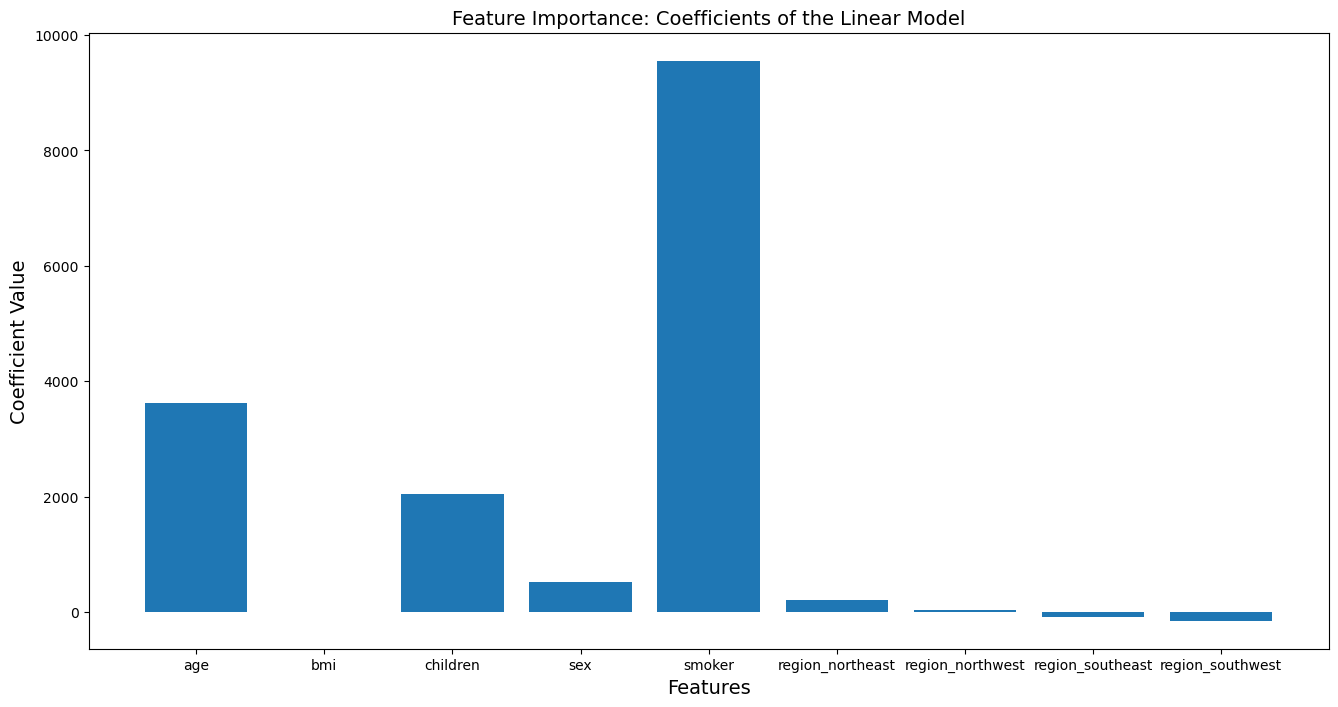

In [272]:
# TODO:
coefficients = regressor.coef_
feature_names = ['age', 'bmi', 'children', 'sex', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']

coeff_df = pd.DataFrame(coefficients, feature_names, columns=['Coefficient'])

print("Coefficients of the Linear Regression Model:\n", coeff_df)

plt.figure(figsize=(16, 8))
plt.bar(feature_names, coefficients)
plt.xlabel("Features", size='14')
plt.ylabel("Coefficient Value", size='14')
plt.title("Feature Importance: Coefficients of the Linear Model", size='14')
plt.show()

# Regularization

L1 regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator) regularization, is a technique used in regression models that encourages simplicity and sparsity in the model coefficients. This is achieved by adding a penalty equal to the absolute value of the magnitude of coefficients to the loss function.\
</br>
Train a regression model using L1 regularization.

In [273]:
# TODO: Use Lasso from sklearn library

In [274]:
lasso = Lasso(alpha=0.1) 
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_mape = mean_absolute_percentage_error(y_test, y_pred_lasso)

lasso_coefficients = lasso.coef_

print("Mean Squared Error of Lasso Regression: " , lasso_mse )
print("Mean Absolute Percentage Error of Lasso Regression: " , lasso_mape)

Mean Squared Error of Lasso Regression:  33597075.66426044
Mean Absolute Percentage Error of Lasso Regression:  0.46888576056514947


L2 regularization, also known as Ridge regularization, is a technique used in regression models to prevent overfitting by adding a penalty equivalent to the square of the magnitude of coefficients to the loss function.
</br>
Train a regression model using L2 regularization.

In [275]:
# TODO: Use Ridge from sklearn library

In [276]:
ridge = Ridge(alpha=0.1)  
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_mape = mean_absolute_percentage_error(y_test, y_pred_ridge)

ridge_coefficients = ridge.coef_

print("Mean Squared Error of ridge Regression: " , ridge_mse )
print("Mean Absolute Percentage Error of ridge Regression: " , ridge_mape)

Mean Squared Error of ridge Regression:  33597671.99731528
Mean Absolute Percentage Error of ridge Regression:  0.46892208516743145


Lasso Coefficients:
                   Lasso Coefficient
age                     3614.885758
bmi                       -9.181645
children                2036.137532
sex                      516.795369
smoker                  9558.373070
region_northeast         296.856374
region_northwest         134.497243
region_southeast          12.386041
region_southwest         -53.288933

Ridge Coefficients:
                   Ridge Coefficient
age                     3614.612984
bmi                       -9.225711
children                2036.050385
sex                      516.877690
smoker                  9557.559629
region_northeast         199.666465
region_northwest          38.699054
region_southeast         -86.551332
region_southwest        -150.171293


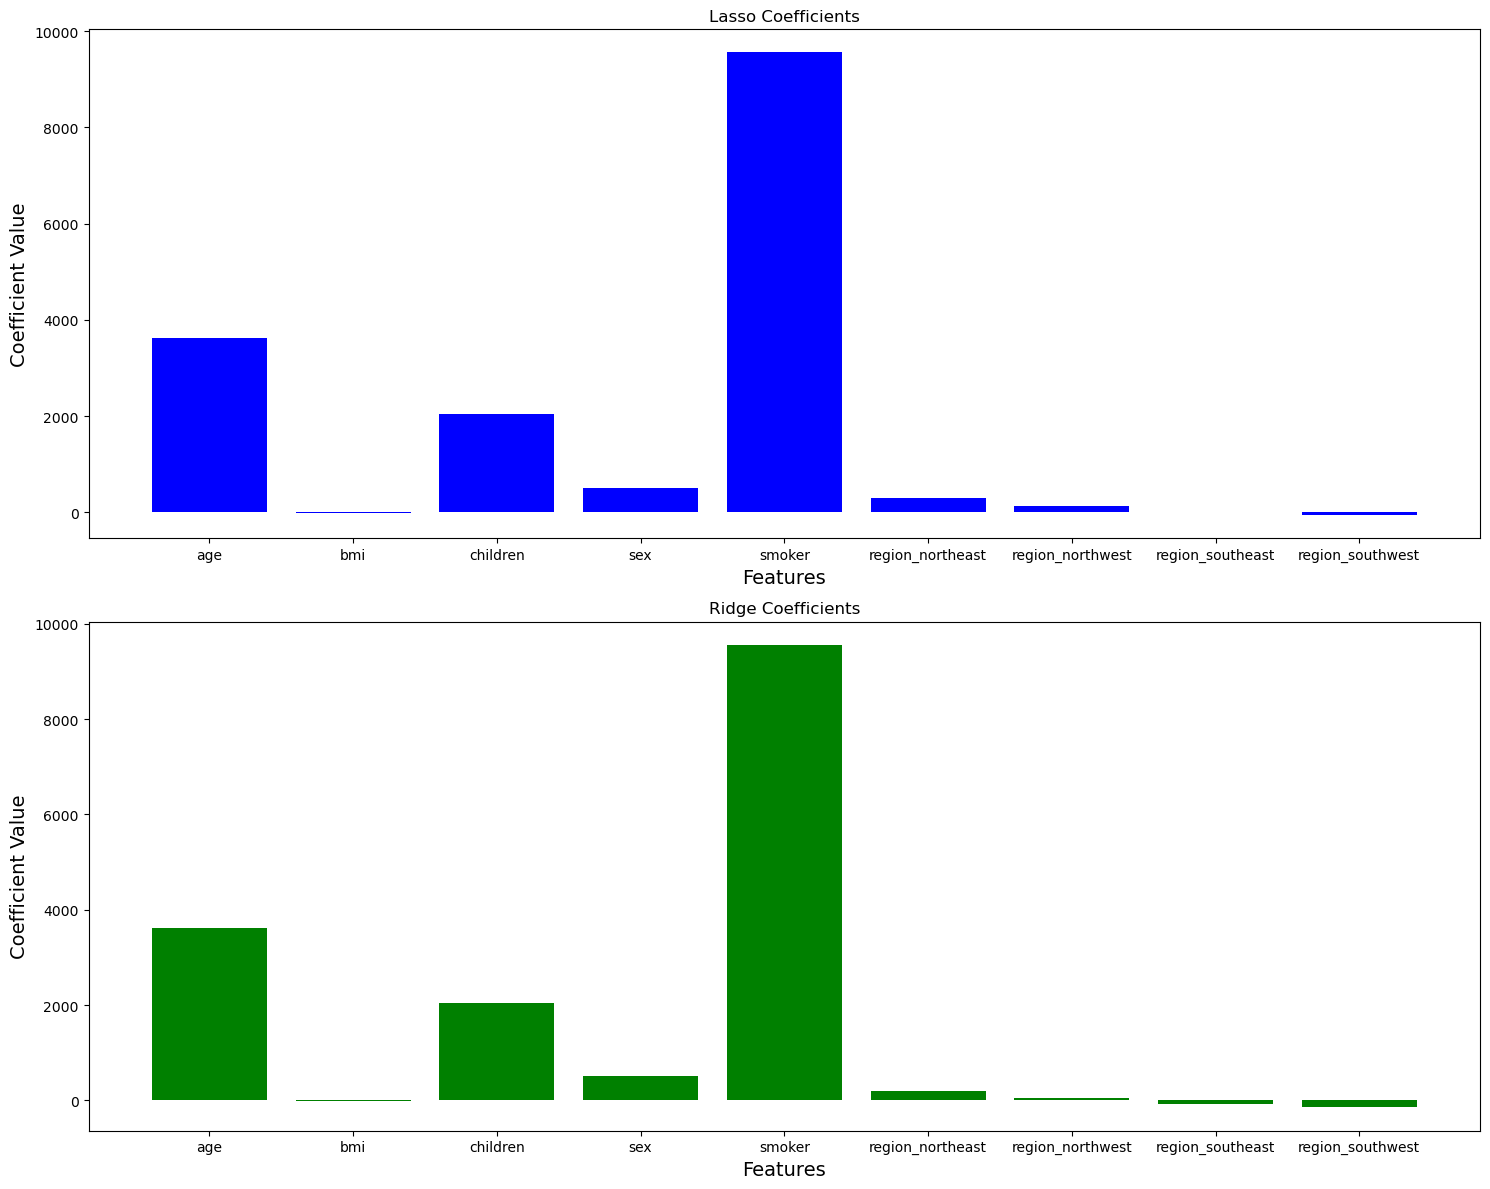

In [299]:
feature_names = ['age', 'bmi', 'children', 'sex', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']

lasso_coeff_df = pd.DataFrame(lasso_coefficients, feature_names, columns=['Lasso Coefficient'])
ridge_coeff_df = pd.DataFrame(ridge_coefficients, feature_names, columns=['Ridge Coefficient'])

print("Lasso Coefficients:\n", lasso_coeff_df)
print("\nRidge Coefficients:\n", ridge_coeff_df)

plt.figure(figsize=(15, 12))

plt.subplot(2, 1, 1)
plt.bar(feature_names, lasso_coefficients, color='blue')
plt.title('Lasso Coefficients')
plt.xlabel("Features", size='14')
plt.ylabel("Coefficient Value", size='14')

plt.subplot(2, 1, 2)
plt.bar(feature_names, ridge_coefficients, color='green')
plt.title('Ridge Coefficients')
plt.xlabel("Features", size='14')
plt.ylabel("Coefficient Value", size='14')

plt.tight_layout()
plt.show()

Test different regularization parameters (alpha) for each regularization method using cross validation and visualize the coefficients of the variables. Use MAPE for evaluation.

**Mean Absolute Percentage Error (MAPE)**:


 is a widely used metric for evaluating the accuracy of forecasting models. It quantifies the prediction error as a percentage, providing an intuitive measure of how far off predictions are from actual values. MAPE is defined as the average of the absolute percentage errors between predicted values and actual values. The formula for calculating MAPE is:

$$
\text{MAPE} = \frac{100}{N} \sum_{t=1}^{N} \left| \frac{A_t - F_t}{A_t} \right|
$$
    
Where:
- $N$ is the number of observations,
- $A_t$ is the actual value,
- $F_t$ is the forecasted value.

In [285]:
# TODO: Use folding methods and mape from sklearn library

In [286]:
# Define the range of alpha values to test
alpha_candidates = np.logspace(-2, 4, 500)

# Set up K-Fold cross-validation
folds = 5
cv_splitter = KFold(n_splits=folds, shuffle=True, random_state=42)

# Variables to store the best results
optimal_alpha , final_model = None, None
lowest_mape = float('inf')



# Loop through all possible alpha values
for alpha_value in alpha_candidates:
    fold_mape_scores = []  # Track MAPE for each fold
    
    # Perform cross-validation
    for train_idx, val_idx in cv_splitter.split(X_train):
        X_train_fold = X_train[train_idx] 
        y_train_fold = y_train[train_idx]
        X_val_fold   = X_train[val_idx] 
        y_val_fold   = y_train[val_idx]
        
        # Train Lasso model with the current alpha
        model = Lasso(alpha=alpha_value, random_state=42)
        model.fit(X_train_fold, y_train_fold)
        
        # Predict and calculate MAPE on validation data
        val_predictions = model.predict(X_val_fold)
        fold_mape = mean_absolute_percentage_error(y_val_fold, val_predictions)
        fold_mape_scores.append(fold_mape)
    
    # Average MAPE across all folds for current alpha
    avg_mape = np.mean(fold_mape_scores)
    
    # Check if this alpha gives better performance
    if avg_mape < lowest_mape:
        lowest_mape = avg_mape
        optimal_alpha = alpha_value
        final_model = model

# Train the final model using the entire training set
final_model.fit(X_train, y_train)

# Make predictions on the test set
test_predictions = final_model.predict(X_test)

# Evaluate the performance on the test set
test_mse = mean_squared_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)
test_mape = mean_absolute_percentage_error(y_test, test_predictions)

# Display the best alpha
print(f"Best alpha: {optimal_alpha}")

# Output the evaluation metrics
print(f"Lasso Regression - Test MSE: {test_mse}")
print(f"Lasso Regression - Test R2 Score: {test_r2}")
print(f"Lasso Regression - Test MAPE: {test_mape * 100:.2f}%")

Best alpha: 85.47984528840414
Lasso Regression - Test MSE: 33927618.416471
Lasso Regression - Test R2 Score: 0.7814628300633246
Lasso Regression - Test MAPE: 47.66%


In [287]:
# Define the range of alpha values to test
alpha_candidates = np.logspace(-2, 4, 500)

# Set up K-Fold cross-validation
folds = 5
cv_splitter = KFold(n_splits=folds, shuffle=True, random_state=42)

# Variables to store the best results
optimal_alpha , final_model = None, None
lowest_mape = float('inf')


# Loop through all possible alpha values
for alpha_value in alpha_candidates:
    fold_mape_scores = []  # Track MAPE for each fold
    
    # Perform cross-validation
    for train_idx, val_idx in cv_splitter.split(X_train):
        X_train_fold = X_train[train_idx] 
        y_train_fold = y_train[train_idx]
        X_val_fold   = X_train[val_idx] 
        y_val_fold   = y_train[val_idx]
        
        # Train Ridge model with the current alpha
        model = Ridge(alpha=alpha_value, random_state=42)
        model.fit(X_train_fold, y_train_fold)
        
        # Predict and calculate MAPE on validation data
        val_predictions = model.predict(X_val_fold)
        fold_mape = mean_absolute_percentage_error(y_val_fold, val_predictions)
        fold_mape_scores.append(fold_mape)
    
    # Average MAPE across all folds for current alpha
    avg_mape = np.mean(fold_mape_scores)
    
    # Check if this alpha gives better performance
    if avg_mape < lowest_mape:
        lowest_mape = avg_mape
        optimal_alpha = alpha_value
        final_model = model

# Train the final Ridge model using the entire training set
final_model.fit(X_train, y_train)

# Make predictions on the test set using the best Ridge model
test_predictions = final_model.predict(X_test)

# Evaluate the Ridge model's performance on the test set
test_mse = mean_squared_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)
test_mape = mean_absolute_percentage_error(y_test, test_predictions)

# Display the best alpha for Ridge
print(f"Best alpha for Ridge: {optimal_alpha}")

# Output the evaluation metrics for Ridge regression
print(f"Ridge Regression - Test MSE: {test_mse}")
print(f"Ridge Regression - Test R2 Score: {test_r2}")
print(f"Ridge Regression - Test MAPE: {test_mape * 100:.2f}%")

Best alpha for Ridge: 0.01
Ridge Regression - Test MSE: 33596991.37951989
Ridge Regression - Test R2 Score: 0.7835924902143232
Ridge Regression - Test MAPE: 46.89%


Add extra variables to dataset to make model more complex, then compare the results. 

In [288]:
# TODO: Increase No. of dimensions using PolynomialFeatures from sklearn 

In [289]:
def get_best_model_reg(X_train, y_train, X_test, y_test, reg_type = "L"):
    # Define the range of alpha values to test
    alpha_candidates = np.logspace(-1, 2, 100)

    # Set up K-Fold cross-validation
    folds = 5
    cv_splitter = KFold(n_splits=folds, shuffle=True, random_state=42)

    # Variables to store the best results
    optimal_alpha , final_model = None, None
    lowest_mape = float('inf')


    # Loop through all possible alpha values
    for alpha_value in alpha_candidates:
        fold_mape_scores = []  # Track MAPE for each fold

        # Perform cross-validation
        for train_idx, val_idx in cv_splitter.split(X_train):
            X_train_fold = X_train[train_idx] 
            y_train_fold = y_train[train_idx]
            X_val_fold   = X_train[val_idx] 
            y_val_fold   = y_train[val_idx]

            # Train Lasso model with the current alpha
            if reg_type == "R":
                model = Ridge(alpha=alpha_value, random_state=42)
            else:
                model = Lasso(alpha=alpha_value, random_state=42)
                
            model.fit(X_train_fold, y_train_fold)

            # Predict and calculate MAPE on validation data
            val_predictions = model.predict(X_val_fold)
            fold_mape = mean_absolute_percentage_error(y_val_fold, val_predictions)
            fold_mape_scores.append(fold_mape)

        # Average MAPE across all folds for current alpha
        avg_mape = np.mean(fold_mape_scores)

        # Check if this alpha gives better performance
        if avg_mape < lowest_mape:
            lowest_mape = avg_mape
            optimal_alpha = alpha_value
            final_model = model

    # Train the final model using the entire training set
    final_model.fit(X_train, y_train)

    # Make predictions on the test set
    test_predictions = final_model.predict(X_test)
    train_predictions = final_model.predict(X_train)

    # Evaluate the performance on the test set
    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    test_r2 = r2_score(y_test, test_predictions)
    train_mape = mean_absolute_percentage_error(y_train, train_predictions)
    test_mape = mean_absolute_percentage_error(y_test, test_predictions)
    
    return (optimal_alpha, train_mse, test_mse, test_r2, train_mape, test_mape)

In [290]:
import warnings
warnings.filterwarnings("ignore")

results = {}
results["Lasso"] = {}
results["Ridge"] = {}

for degree in range(1,4):
    polynomial = PolynomialFeatures(degree = degree)
    X_train_polynomial = polynomial.fit_transform(X_train)
    X_test_polynomial = polynomial.fit_transform(X_test)
    print(get_best_model_reg(X_train_polynomial, y_train, X_test_polynomial, y_test, reg_type = "L"))
    print(get_best_model_reg(X_train_polynomial, y_train, X_test_polynomial, y_test, reg_type = "R"))
    
    optimal_alpha, train_mse, test_mse, test_r2, train_mape, test_mape = get_best_model_reg(X_train_polynomial, y_train, X_test_polynomial, y_test, reg_type = "R")
    
    results["Ridge"][degree] = {
        'Optimal alpha': optimal_alpha,
        'Train MSE': train_mse,
        'Test MSE': test_mse,
        'Test R2': test_r2,
        'Train MAPE': train_mape,
        'Test MAPE': test_mape
    }
    
    optimal_alpha, train_mse, test_mse, test_r2, train_mape, test_mape = get_best_model_reg(X_train_polynomial, y_train, X_test_polynomial, y_test, reg_type = "L")
    
    
    results["Lasso"][degree] = {
        'Optimal alpha': optimal_alpha,
        'Train MSE': train_mse,
        'Test MSE': test_mse,
        'Test R2': test_r2,
        'Train MAPE': train_mape,
        'Test MAPE': test_mape
    }

    

(86.97490026177834, 37329315.00329126, 33931493.75890561, 0.7814378679113161, 0.4216783827137291, 0.4766345753242809)
(0.1, 37277682.68352516, 33597671.997315265, 0.7835881061669379, 0.4220541658999374, 0.4689220851674313)
(0.1, 22831079.101870216, 20712297.61296828, 0.8665863649000842, 0.2940048173937393, 0.30198706278294685)
(0.1, 22831079.084613357, 20712813.65932313, 0.8665830409028451, 0.2940418470357025, 0.3020446725285116)
(75.64633275546291, 21462001.98687875, 21921316.550539482, 0.8587987396747194, 0.3012809652296304, 0.3437527954501268)
(100.0, 21034504.425469656, 22759373.673386127, 0.8534005820550481, 0.29890066007062477, 0.35737747410647835)


Report your best model with its evaluated results.

In [291]:
# TODO: Print each model's loss on the training and the test set.

In [292]:
def create_model_df(results, model_name):
    model_df = pd.DataFrame(results[model_name]).T
    model_df['Model'] = model_name
    model_df['Degree'] = model_df.index
    
    return model_df

ridge_df = create_model_df(results, "Ridge")
lasso_df = create_model_df(results, "Lasso")

final_results = pd.concat([ridge_df, lasso_df], ignore_index=True)

final_results = final_results[['Model', 'Degree', 'Optimal alpha', 
                                       'Train MSE', 'Test MSE', 'Test R2', 
                                       'Train MAPE', 'Test MAPE']]

final_results.sort_values(by='Test MAPE', inplace=True)


In [293]:
final_results

,Model,Degree,Optimal alpha,Train MSE,Test MSE,Test R2,Train MAPE,Test MAPE
4,Lasso,2,0.100000,2.283108e+07,2.071230e+07,0.866586,0.294005,0.301987
1,Ridge,2,0.100000,2.283108e+07,2.071281e+07,0.866583,0.294042,0.302045
5,Lasso,3,75.646333,2.146200e+07,2.192132e+07,0.858799,0.301281,0.343753
2,Ridge,3,100.000000,2.103450e+07,2.275937e+07,0.853401,0.298901,0.357377
0,Ridge,1,0.100000,3.727768e+07,3.359767e+07,0.783588,0.422054,0.468922
3,Lasso,1,86.974900,3.732932e+07,3.393149e+07,0.781438,0.421678,0.476635


In [294]:
optimal_index = final_results['Test MAPE'].idxmin()
optimal_degree = final_results.loc[optimal_index, 'Degree']
optimal_alpha = final_results.loc[optimal_index, 'Optimal alpha']

polynomial = PolynomialFeatures(degree=optimal_degree, include_bias=False)
X_train_polynomial = polynomial.fit_transform(X_train)
X_test_polynomial = polynomial.transform(X_test_main)


best_model = Lasso(alpha=optimal_alpha, random_state=42)
best_model.fit(X_train_polynomial, y_train)

y_pred = best_model.predict(X_test_polynomial).reshape(-1, 1)

In [295]:
y_pred.shape

(465, 1)

In [296]:
submission = pd.DataFrame(y_pred, columns=['charges'])

In [297]:
submission

,charges
0,23523.421266
1,9443.470739
2,10533.028815
3,11293.032214
4,15827.065440
...,...
460,13978.994170
461,3209.038061
462,5925.174973
463,12450.458981


In [298]:
submission.to_csv('submission.csv', index=False)

## Questions

1. Compare the weight distribution when applying L1/L2 regularization and their sparsity?




In Ridge Regression (L2 regularization), the weights are typically larger compared to those in Lasso Regression (L1 regularization). This is because Ridge applies a penalty proportional to the square of the weights, which shrinks the coefficients but generally does not drive them to zero. As a result, all features remain in the model, but with reduced magnitudes.

On the other hand, Lasso (L1 regularization) penalizes the absolute values of the weights, which not only shrinks coefficients but can also force some of them to become exactly zero. This leads to sparsity, as Lasso effectively performs feature selection by excluding some variables from the model.


### Lasso Regression:

The objective function for Lasso regression is defined as:

$$
\underset{\beta}{\text{minimize}} \ \frac{1}{2n} \sum_{i=1}^{n} \left( y_i - \mathbf{x}_i^T \boldsymbol{\beta} \right)^2 + \lambda \sum_{j=1}^{p} |\beta_j|
$$

Where:
- The $ \sum_{j=1}^{p} |\beta_j| $ term applies L1 regularization, encouraging sparsity by driving some coefficients to zero, effectively performing feature selection.

### Ridge Regression:

The objective function for Ridge regression is defined as:
$$
\underset{\beta}{\text{minimize}} \ \frac{1}{2n} \sum_{i=1}^{n} \left( y_i - \mathbf{x}_i^T \boldsymbol{\beta} \right)^2 + \lambda \sum_{j=1}^{p} \beta_j^2
$$

Where:
- The $ \sum_{j=1}^{p} \beta_j^2 $ term introduces L2 regularization, which penalizes large coefficients and shrinks them towards zero, but unlike Lasso, it does not drive any coefficients exactly to zero.




2. How does the regularization parameter (alpha) affect each feature? Does it help to model's explainability?

Regularization Strength: The parameter 𝛼 (lambda) controls the amount of regularization applied to the model. A larger 𝛼 increases the penalty for larger coefficients, leading to greater shrinkage of the coefficients.

In Lasso: Increasing 𝛼 will result in more coefficients being pushed to zero, enhancing the model's sparsity and potentially improving interpretability by focusing on the most relevant features.

In Ridge: Increasing 𝛼 leads to a reduction in the size of all coefficients, but no coefficients will be exactly zero. The model remains complex and includes all features, which can make interpretation more challenging.

Explainability:
Lasso’s ability to zero out coefficients contributes significantly to model explainability, as it directly highlights the most important features.
Ridge regression, while controlling for multicollinearity and improving prediction accuracy, may reduce explainability because it retains all features, making it harder to discern which are the most influential.


3. How does the regularization affect dimension expansion?

Regularization methods like Lasso and Ridge can help mitigate issues related to high-dimensional data, but they approach it differently:

Lasso: By promoting sparsity, Lasso effectively reduces the dimensionality of the model, eliminating irrelevant features and focusing on a smaller subset. This is particularly useful in high-dimensional settings where the number of features exceeds the number of observations.

Ridge: While Ridge does not perform feature selection, it helps to stabilize the estimates of the coefficients in high-dimensional spaces where multicollinearity is an issue. It does not reduce dimensionality directly but makes the model more robust to overfitting by controlling the complexity of the coefficients.
